In [17]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_rows = 100
%matplotlib inline
importlib.reload(func)
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

In [2]:
df_101_tier = pd.read_excel("data/df_ira_gis.xlsx")
# df_101_tier = df_101_tier.set_index("RTN")

In [5]:
df_101_tier.shape

(10898, 386)

In [6]:
df_101_tier.head()

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,NH_OTHER,NH_MULTI,HISP,H_WHITE,H_BLACK,H_NATV,H_ASN,H_ISLND,H_OTHER,H_MULTI
1-0017194,1,0,0,0,1,1,0,0,0,0,...,2,30,105,51,2,2,0,0,39,11
1-0017315,1,1,1,0,0,0,0,0,0,0,...,4,19,47,28,0,0,1,0,13,5
1-0017321,1,1,1,0,0,0,0,0,0,0,...,6,60,723,593,13,7,1,0,93,16
1-0017322,1,0,0,0,1,1,0,0,0,0,...,16,130,316,125,19,7,0,0,130,35
1-0017326,1,1,1,0,0,0,0,0,0,1,...,0,27,359,184,26,1,1,0,123,24


In [7]:
df_101_tier["IRA"]

1-0017194    IRA_Not_Present
1-0017315        IRA_Present
1-0017321        IRA_Present
1-0017322        IRA_Present
1-0017326        IRA_Present
1-0017327    IRA_Not_Present
1-0017329        IRA_Present
1-0017330    IRA_Not_Present
1-0017331    IRA_Not_Present
1-0017334        IRA_Present
1-0017336        IRA_Present
1-0017342    IRA_Not_Present
1-0017343    IRA_Not_Present
1-0017343    IRA_Not_Present
1-0017346    IRA_Not_Present
1-0017348        IRA_Present
1-0017350    IRA_Not_Present
1-0017351    IRA_Not_Present
1-0017352    IRA_Not_Present
1-0017354        IRA_Present
1-0017355    IRA_Not_Present
1-0017360    IRA_Not_Present
1-0017364        IRA_Present
1-0017367    IRA_Not_Present
1-0017368    IRA_Not_Present
1-0017370    IRA_Not_Present
1-0017371    IRA_Not_Present
1-0017373        IRA_Present
1-0017378    IRA_Not_Present
1-0017381        IRA_Present
1-0017382        IRA_Present
1-0017383        IRA_Present
1-0017391    IRA_Not_Present
1-0017393    IRA_Not_Present
1-0017394    I

## 1. Use all features and Oversampling

In [8]:
X = df_101_tier.drop("IRA", axis=1)
y = df_101_tier["IRA"]
# y = df_101_tier["IRA"]

In [9]:
y.groupby(y).count()

IRA
IRA_Not_Present    6930
IRA_Present        3968
Name: IRA, dtype: int64

### 1.1 Use Random Forest to extract features

In [10]:
# Use random forest to extract useful features
# Use all the data
rfmodel = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='balanced')
rfmodel.fit(X, y)
feat_import = pd.DataFrame({"Feature": X.columns, "Importance": rfmodel.feature_importances_})\
        .sort_values("Importance", ascending=False)
feat20 = feat_import.iloc[:20, 0].tolist()

In [11]:
feat20

['D8A',
 'D4J',
 'D8B',
 'G4',
 'D10I',
 'C6H',
 'H13AVOLUME',
 'D10A',
 'H1',
 'D7B',
 'D4E',
 'STAFF_UNASSIGNED',
 'LUST_ELIGIBLE_UNKNOWN',
 'F14',
 'C6E',
 'D6A',
 'D4M',
 'D10J',
 'G3',
 'C6L']

### 1.2 Use all features to model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, feat20[:15]], 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=1634)
labels = ["IRA_Present", "IRA_Not_Present"]

In [13]:
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(10394, 15)
dict_items([('IRA_Present', 5197), ('IRA_Not_Present', 5197)])
(10394, 15)
Training size: 10394
Test size: 2725


Normalized confusion matrix
[[ 0.83568548  0.16431452]
 [ 0.22388921  0.77611079]]
                 precision    recall  f1-score   support

    IRA_Present       0.68      0.84      0.75       992
IRA_Not_Present       0.89      0.78      0.83      1733

    avg / total       0.82      0.80      0.80      2725



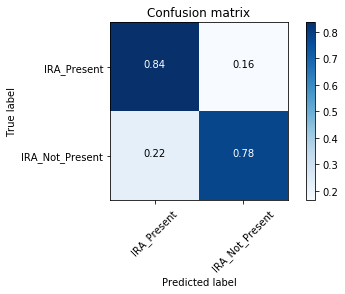

In [18]:
ab = AdaBoostClassifier(learning_rate=0.05, n_estimators=500)
ab.fit(X_train, y_train)
y_predict = ab.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=labels), classes=labels)
print(classification_report(y_test, y_predict, labels=labels, target_names=labels))

Confusion matrix, without normalization
[[ 804  188]
 [ 384 1349]]
                 precision    recall  f1-score   support

    IRA_Present       0.68      0.81      0.74       992
IRA_Not_Present       0.88      0.78      0.83      1733

    avg / total       0.80      0.79      0.79      2725



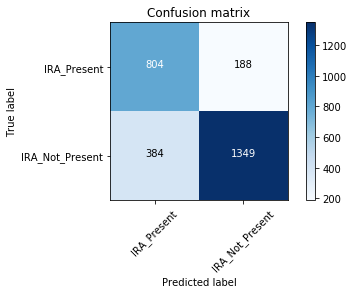

In [15]:
rf = RandomForestClassifier(max_depth=3, n_estimators=500, max_features=0.2, n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=labels), classes=labels)
print(classification_report(y_test, y_predict, labels=labels, target_names=labels))

Confusion matrix, without normalization
[[ 819  173]
 [ 389 1344]]
                 precision    recall  f1-score   support

    IRA_Present       0.68      0.83      0.74       992
IRA_Not_Present       0.89      0.78      0.83      1733

    avg / total       0.81      0.79      0.80      2725



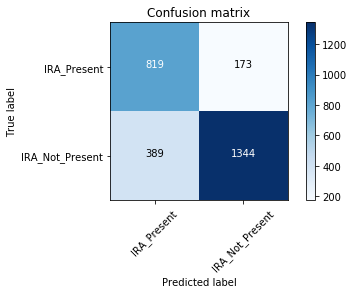

In [16]:
svc = LinearSVC(dual=False, C=0.01, penalty='l1')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=labels), classes=labels)
print(classification_report(y_test, y_predict, labels=labels, target_names=labels))

Confusion matrix, without normalization
[[ 233  166]
 [ 508 1491]]
             precision    recall  f1-score   support

     Tier1D       0.31      0.58      0.41       399
 Non-Tier1D       0.90      0.75      0.82      1999

avg / total       0.80      0.72      0.75      2398



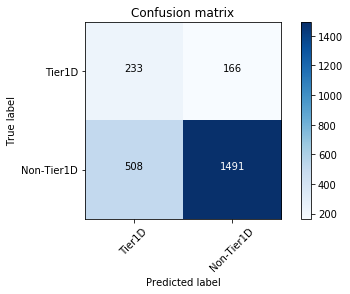

In [ ]:
# {'C': 0.1, 'dual': False, 'penalty': 'l2'}
lg = LogisticRegression(C=0.1, dual=False, )
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=labels), classes=labels)
print(classification_report(y_test, y_predict, labels=labels, target_names=labels))

In [27]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Xs = sel.fit_transform(X)
Xsf = X.columns[sel.variances_ > .8 * (1 - .8)].tolist()
Xs = pd.DataFrame(Xs, columns=Xsf)

In [29]:
X.shape

(10888, 154)

In [30]:
Xs.head()

,A1,B6,C6H,C6L,D10A,D10I,D4M,D6A,D9G,D9L,...,H13AOFFSITE,H13AVOLUME,H13BVOLUME,H13CVOLUME,H16,H3,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,STAFF_UNASSIGNED,PETROLEUM
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### PCA

In [17]:
pca = PCA(n_components=10)
Xpca = pca.fit_transform(X)

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.76038212,  0.85041021,  0.90658705,  0.93995279,  0.96008573,
        0.97190767,  0.98024974,  0.98487089,  0.98822489,  0.99101516])